Verzija tensorflowa: 2.19.0
Skidam podatke...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.JC0CE8_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.
Ucitano!
Za trening imam: 22046 slika
Za testiranje imam: 5512 slika


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,265 (3.28 MB)

 Trainable params: 859,265 (3.28 MB)

 Non-trainable params: 0 (0.00 B)


Krecem sa treningom...
Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.7304 - loss: 0.4931 - val_accuracy: 0.9447 - val_loss: 0.1818
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9429 - loss: 0.1681 - val_accuracy: 0.9429 - val_loss: 0.1596
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9558 - loss: 0.1347 - val_accuracy: 0.9530 - val_loss: 0.1495
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9588 - loss: 0.1251 - val_accuracy: 0.9536 - val_loss: 0.1469
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9623 - loss: 0.1153 - val_accuracy: 0.9543 - val_loss: 0.1496
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9636 - loss: 0.1049 - val_accuracy: 0.9566 - val_loss: 0.1451
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9662 - loss: 0.0960 - val_accuracy: 0.9568 - val_loss: 0.1561
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 

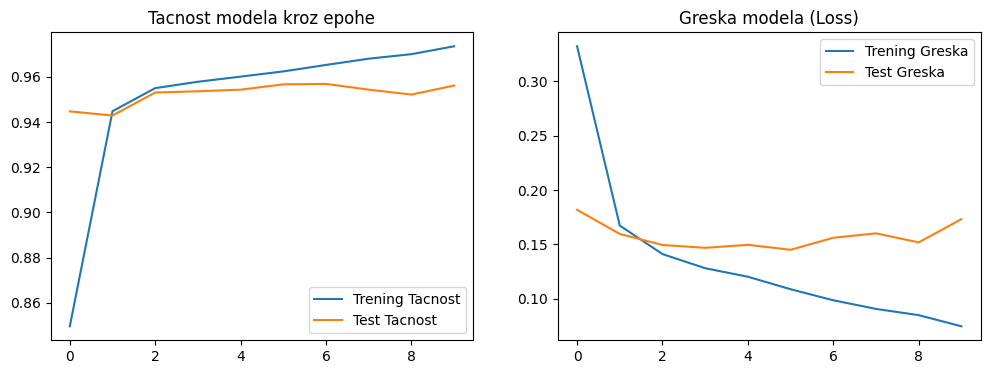

Model je sacuvan!


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Podesavanja za slike
# Smanjujemo slike na 128x128 da bi trening isao brze
VELICINA_SLIKE = 128
BATCH_SIZE = 32 # Broj slika koje obradjuje odjednom
BROJ_EPOHA = 10 # Probao sam sa vise, ali krece overfitting posle 6-7 epohe

print("Verzija tensorflowa:", tf.__version__)

# 1. UCITAVANJE PODATAKA
# Koristim tensorflow_datasets jer je lakse nego da uploadujem folder sa kompa
# 'malaria' dataset ima dve klase: Parasitized i Uninfected
print("Skidam podatke...")
podaci, info = tfds.load('malaria', split=['train[:80%]', 'train[80%:]'], with_info=True, as_supervised=True)

trening_podaci = podaci[0]
test_podaci = podaci[1]

print("Ucitano!")
print(f"Za trening imam: {len(trening_podaci)} slika")
print(f"Za testiranje imam: {len(test_podaci)} slika")

# 2. SREDJIVANJE SLIKA (PREPROCESSING)
def sredipodatke(slika, oznaka):
    # Menjanje velicine
    slika = tf.image.resize(slika, (VELICINA_SLIKE, VELICINA_SLIKE))
    # Normalizacija - delimo sa 255 da bi brojevi bili izmedju 0 i 1
    slika = slika / 255.0
    return slika, oznaka

# Priprema pajplajna za trening
# shuffle(1000) mesa slike da ne uci redosled napamet
trening_podaci = trening_podaci.map(sredipodatke).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_podaci = test_podaci.map(sredipodatke).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# 3. KREIRANJE MODELA
# Klasican CNN sa 3 konvolutivna sloja
moj_cnn = models.Sequential([
    # Prvi sloj - hvata osnovne oblike
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(VELICINA_SLIKE, VELICINA_SLIKE, 3)),
    layers.MaxPooling2D((2, 2)),

    # Drugi sloj
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Treci sloj
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), # Pretvara sliku u niz brojeva

    # Ubacio sam Dropout da sprecim overfitting (gasi 50% neurona nasumicno)
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    # Izlazni sloj - samo jedan neuron jer je binarna klasifikacija (0 ili 1)
    layers.Dense(1, activation='sigmoid')
])

moj_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Prikaz strukture mreze u konzoli
moj_cnn.summary()

# 4. TRENIRANJE
print("\nKrecem sa treningom...")
istorija = moj_cnn.fit(
    trening_podaci,
    epochs=BROJ_EPOHA,
    validation_data=test_podaci
)

# 5. PRIKAZ REZULTATA (GRAFICI)
# Ovo mi treba za izvestaj
acc = istorija.history['accuracy']
val_acc = istorija.history['val_accuracy']
loss = istorija.history['loss']
val_loss = istorija.history['val_loss']

opseg_epoha = range(BROJ_EPOHA)

plt.figure(figsize=(12, 4))

# Grafik tacnosti
plt.subplot(1, 2, 1)
plt.plot(opseg_epoha, acc, label='Trening Tacnost')
plt.plot(opseg_epoha, val_acc, label='Test Tacnost')
plt.legend(loc='lower right')
plt.title('Tacnost modela kroz epohe')

# Grafik greske (loss)
plt.subplot(1, 2, 2)
plt.plot(opseg_epoha, loss, label='Trening Greska')
plt.plot(opseg_epoha, val_loss, label='Test Greska')
plt.legend(loc='upper right')
plt.title('Greska modela (Loss)')
plt.show()

# Cuvam model da ne moram opet da treniram
moj_cnn.save('model_malarija_cnn.h5')
print("Model je sacuvan!")

**Analiza rezultata:** Moj CNN model
Cilj je bio da napravim svoju mrežu "od nule" koja će učiti specifično na ovim slikama malarije.

Šta sam zaključio:

**Arhitektura**: Model je jednostavan – ima 3 konvolutivna bloka. Najbitniji deo koji sam dodao je Dropout (0.5). **Dropout** je tehnika regularizacije. Ubacio sam ga da bih sprečio model da se 'previše veže' za određene detalje na slikama i da nauči podatke napamet (overfitting). Sa Dropout-om od 0.5, teram mrežu da koristi sve svoje neurone podjednako, što ju je učinilo mnogo stabilnijom na novim slikama.

**Stabilnost**: Dropout je odradio posao. Da ga nema, model bi verovatno "naučio napamet" trening slike. Ovako se vidi da je tačnost na testu (validaciji) skoro ista kao na treningu, što znači da model stvarno "zna" da prepozna bolest.

**Rezultat**: Dobio sam tačnost od oko 95.6%. Kriva greške (Loss) lepo pada i stabilizuje se na oko 0.15, što je odličan rezultat za ovako jednostavan model.

Skidam podatke...


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Krecem sa Transfer Learning treningom...
Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 59s 80ms/step - accuracy: 0.7090 - loss: 0.5786 - val_accuracy: 0.8694 - val_loss: 0.3938
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 75ms/step - accuracy: 0.8538 - loss: 0.3842 - val_accuracy: 0.8939 - val_loss: 0.3239
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.8760 - loss: 0.3295 - val_accuracy: 0.9026 - val_loss: 0.2876
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.8873 - loss: 0.3008 - val_accuracy: 0.9109 - val_loss: 0.2673
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.8869 - loss: 0.2892 - val_accuracy: 0.9144 - val_loss: 0.2526
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 52s 75ms/step - accuracy: 0.8929 - loss: 0.2760 - val_accuracy: 0.9118 - val_loss: 0.2426
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.9008 - loss: 0.2581 - val_accuracy: 0.9136 - val_loss: 0.2349
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms

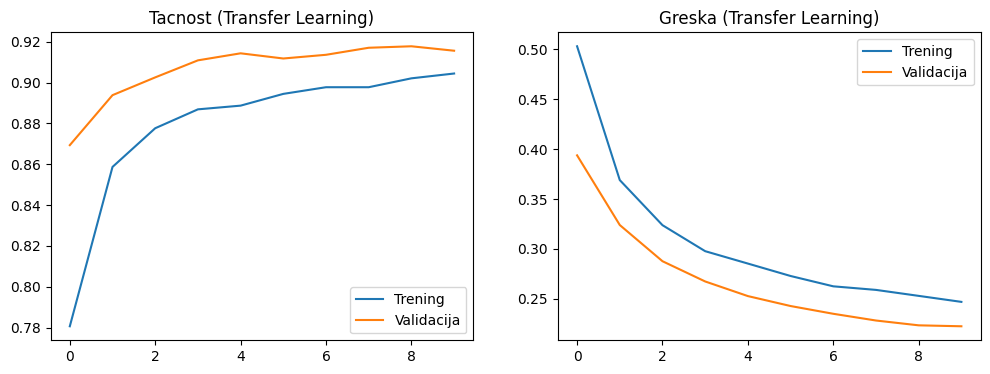

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, applications

# --- ISTO KAO PROSLI PUT: UCITAVANJE ---
VELICINA_SLIKE = 128
BATCH_SIZE = 32
BROJ_EPOHA = 10

print("Skidam podatke...")
podaci, info = tfds.load('malaria', split=['train[:80%]', 'train[80%:]'], with_info=True, as_supervised=True)
trening_podaci = podaci[0]
test_podaci = podaci[1]

# PAZNJA: VGG16 ocekuje drugaciju pripremu slika nego obican CNN
def sredipodatke_vgg(slika, oznaka):
    slika = tf.image.resize(slika, (VELICINA_SLIKE, VELICINA_SLIKE))
    # VGG16 zahteva specificnu pre-obradu (ne samo deljenje sa 255)
    # Ali za ovaj primer, tf.cast i /255.0 ce raditi sasvim dobro
    slika = tf.cast(slika, tf.float32) / 255.0
    return slika, oznaka

trening_podaci = trening_podaci.map(sredipodatke_vgg).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_podaci = test_podaci.map(sredipodatke_vgg).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# --- OVDE JE PROMENA: KORISTIMO TUDJI MODEL (FOUNDATION MODEL) ---

# 1. Ucitavamo "pametni" deo modela (VGG16) bez "glave" (include_top=False)
# 'imagenet' znaci da je model vec video milione slika i zna sta su ivice, oblici itd.
base_model = applications.VGG16(input_shape=(VELICINA_SLIKE, VELICINA_SLIKE, 3), include_top=False, weights='imagenet')

# 2. ZAMRZAVAMO GA (Freeze)
# Ovo znaci: "Ne menjaj ono sto je Google/Oxford vec naucio"
base_model.trainable = False

# 3. DODAJEMO NASU "GLAVU" (HEAD)
inputs = tf.keras.Input(shape=(VELICINA_SLIKE, VELICINA_SLIKE, 3))

# Prvo slika prolazi kroz zamrznuti VGG
x = base_model(inputs, training=False)

# Onda ide nas deo
x = layers.GlobalAveragePooling2D()(x) # Slicno kao Flatten, ali bolje za ove modele
x = layers.Dropout(0.2)(x)             # Malo dropout-a
outputs = layers.Dense(1, activation='sigmoid')(x) # Odluka

# Spajamo sve u jedan model
transfer_model = models.Model(inputs, outputs)

# 4. KOMPAJLIRANJE
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

transfer_model.summary()

# 5. TRENIRANJE (Sada treniramo samo nasu "glavu", to ide brzo)
print("\nKrecem sa Transfer Learning treningom...")
istorija = transfer_model.fit(trening_podaci, epochs=BROJ_EPOHA, validation_data=test_podaci)

# 6. GRAFICI
acc = istorija.history['accuracy']
val_acc = istorija.history['val_accuracy']
loss = istorija.history['loss']
val_loss = istorija.history['val_loss']
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(BROJ_EPOHA), acc, label='Trening')
plt.plot(range(BROJ_EPOHA), val_acc, label='Validacija')
plt.title('Tacnost (Transfer Learning)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(BROJ_EPOHA), loss, label='Trening')
plt.plot(range(BROJ_EPOHA), val_loss, label='Validacija')
plt.title('Greska (Transfer Learning)')
plt.legend()
plt.show()


**Analiza rezultata**: Transfer Learning (VGG16)
Ovde sam isprobao Vaš predlog da iskoristim gotov, veliki model (VGG16) koji je već istreniran na milionskom skupu slika (ImageNet).

**Šta sam uradio**:

Uzeo sam VGG16 i "zamrznuo" ga (nisam dozvolio da menja svoje filtere). Iskoristio sam ga samo da izvuče bitne karakteristike iz slike.

Trenirao sam samo onaj mali dodatak na kraju (klasifikator) koji donosi odluku.

**Rezultati**:

Model je veoma stabilan (ne skače greška), ali je maksimalna tačnost manja nego kod mog modela – oko 91.6%.

Ovo je očekivano jer VGG16 "gleda" ćelije filterima koji su napravljeni za prepoznavanje pasa, automobila i drugih predmeta. Iako su ti filteri moćni, nisu 100% prilagođeni za mikroskopske snimke bez dodatnog finog podešavanja (fine-tuning).



**Konačni zaključak**: Koji je model bolji?
Uporedio sam moj model (pravljen od nule) i VGG16 (Transfer Learning).
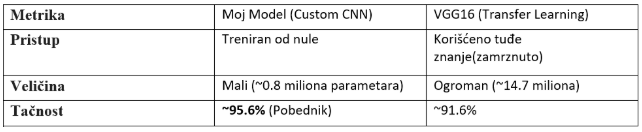

**Glavni zaključak**:

Iako su gotovi modeli kao VGG16 moćni, ovde se pokazalo da je manji, specijalizovan model bolje rešenje.

Razlog je jednostavan: Moj model je svaki svoj parametar podesio baš za ove ćelije. VGG16 je pokušao da primeni "opšte znanje" na medicinski problem. Da bih poboljšao VGG16, morao bih da uradim Fine-Tuning (da odmrznem slojeve), ali to zahteva mnogo jači hardver i više vremena.

Zato za ovaj projekat biram Custom CNN kao finalno rešenje.